In [19]:
!pip install seaborn==0.9.0

In [20]:
import pandas as pd
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

filmes = pd.read_csv(uri_filmes)

filmes.columns = ['filme_id', 'titulo', 'generos']

filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [23]:
from sklearn.cluster import KMeans
modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print(f'Grupos {modelo.labels_}')

Grupos [1 1 0 ... 0 1 0]


In [24]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[ 0.02842544 -0.16730294 -0.10774835 -0.25303864 -0.27045122  0.17036898
  -0.17528045  0.10080642  0.09657078 -0.09256943 -0.09008009 -0.12371177
  -0.09471396  0.00448731 -0.18992422  0.1428129  -0.09750784 -0.48741936
   0.06102277  0.03533821]
 [-0.05917995 -0.00648666  0.90088969  2.24927273  2.44599125  0.208591
  -0.31167562 -0.2025502  -0.59037397  0.89092232 -0.09492563 -0.275556
   0.33006955  0.37422669 -0.12691943 -0.27219687  0.12969643 -0.47035435
  -0.17005261 -0.08426342]
 [-0.05917995  0.50469154 -0.07386893 -0.23236074 -0.26683411 -0.60296525
   0.66313171 -0.21309982 -0.02946246 -0.11500567  0.31203746  0.49252955
   0.13862138 -0.17839937  0.6256255  -0.30840353  0.2353157   1.66934342
  -0.

In [25]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.028425,-0.167303,-0.107748,-0.253039,-0.270451,0.170369,-0.175280,0.100806,0.096571,-0.092569,-0.090080,-0.123712,-0.094714,0.004487,-0.189924,0.142813,-0.097508,-0.487419,0.061023,0.035338
1,-0.059180,-0.006487,0.900890,2.249273,2.445991,0.208591,-0.311676,-0.202550,-0.590374,0.890922,-0.094926,-0.275556,0.330070,0.374227,-0.126919,-0.272197,0.129696,-0.470354,-0.170053,-0.084263
2,-0.059180,0.504692,-0.073869,-0.232361,-0.266834,-0.602965,0.663132,-0.213100,-0.029462,-0.115006,0.312037,0.492530,0.138621,-0.178399,0.625626,-0.308404,0.235316,1.669343,-0.108090,-0.068860


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8f96f07f0>,
      dtype=object)

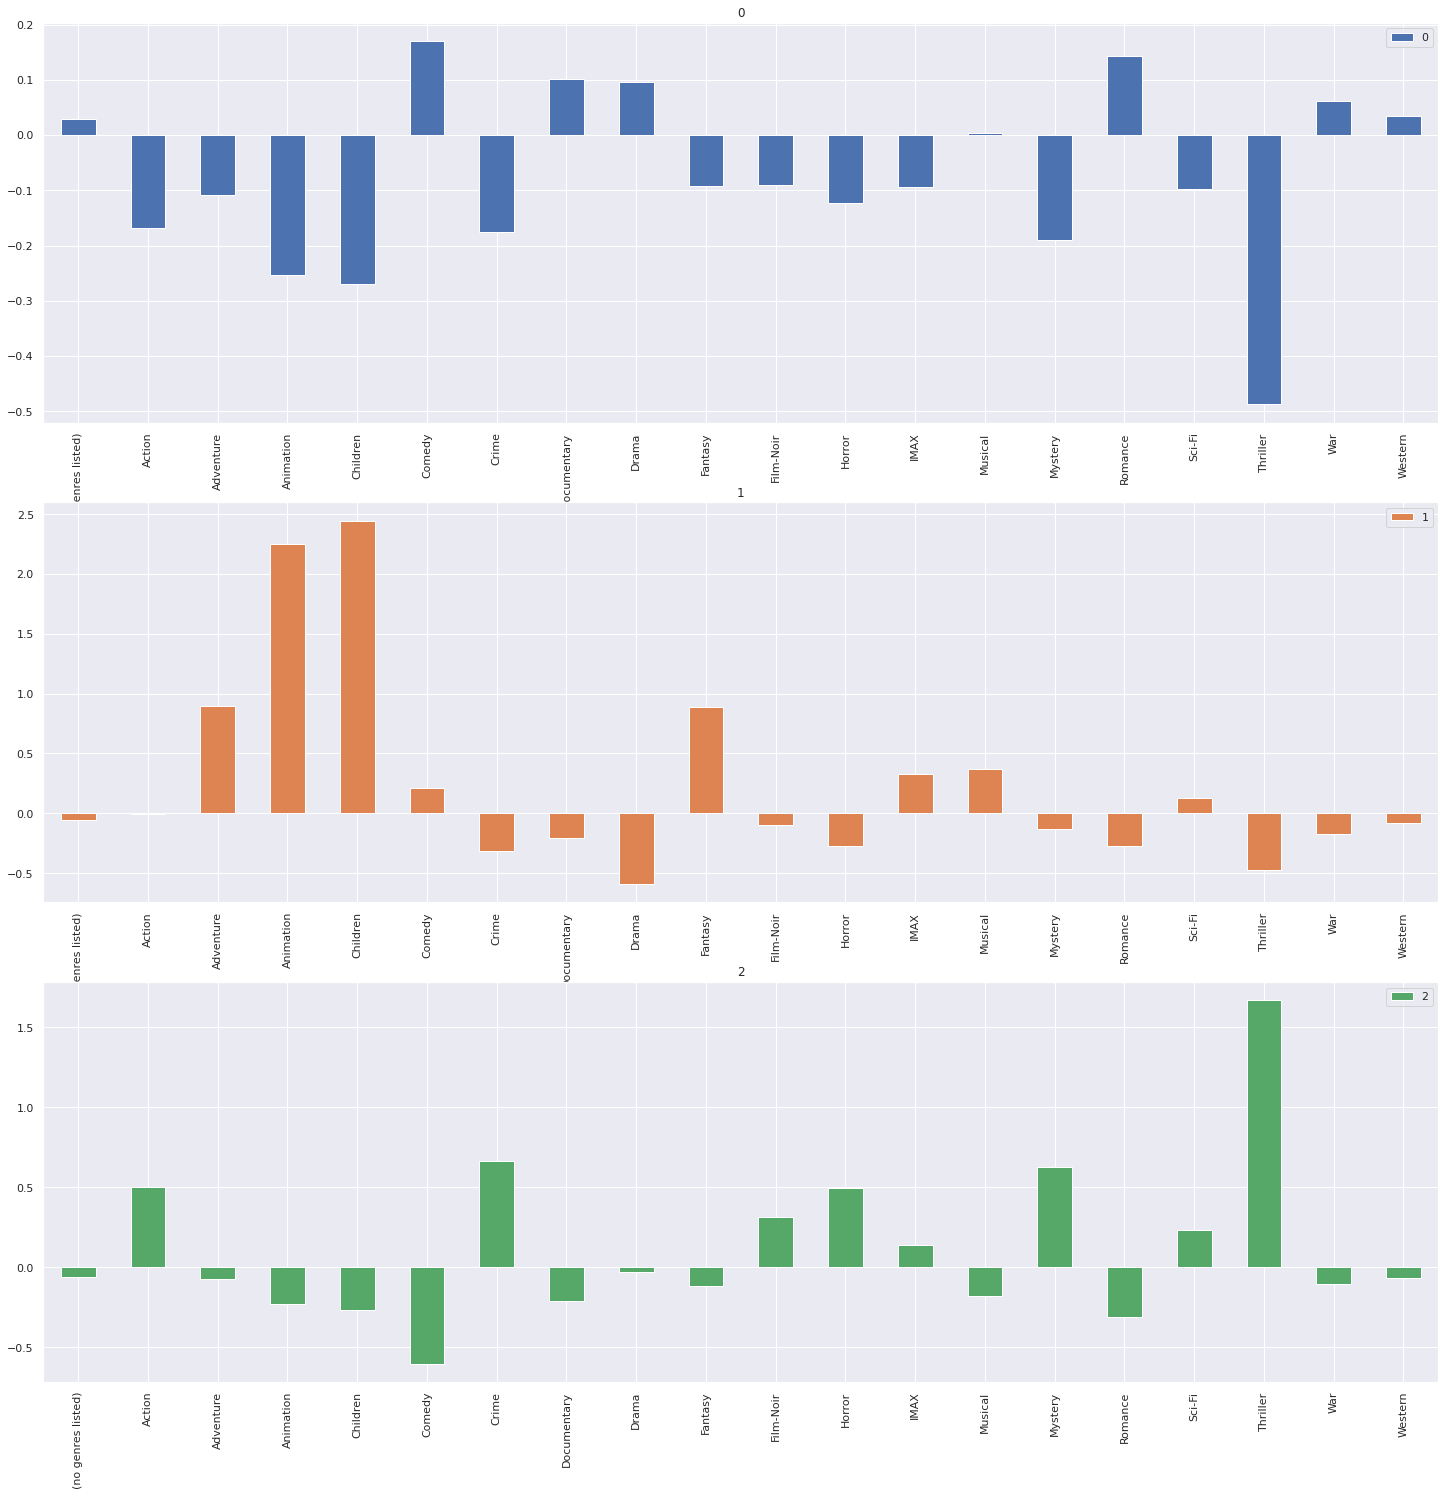

In [26]:
grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 25),
               sharex=False)

In [27]:

grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
720,940,"Adventures of Robin Hood, The (1938)",Action|Adventure|Romance,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1015,1326,Amityville II: The Possession (1982),Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
188,220,Castle Freak (1995),Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3232,4368,Dr. Dolittle 2 (2001),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7539,84950,Take Me Home Tonight (2011),Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9015,140301,The Escort (2015),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
213,249,Immortal Beloved (1994),Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2512,3360,Hoosiers (a.k.a. Best Shot) (1986),Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
7341,78103,Shake Hands with the Devil (2007),Drama|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1358,1855,Krippendorf's Tribe (1998),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.manifold import TSNE
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ -1.0992554,  72.87842  ],
       [-49.63961  , -30.076565 ],
       [ -4.86801  , -56.70258  ],
       ...,
       [ 12.140385 ,  -8.172224 ],
       [ 37.91677  ,  55.53675  ],
       [-15.828015 ,  12.392197 ]], dtype=float32)

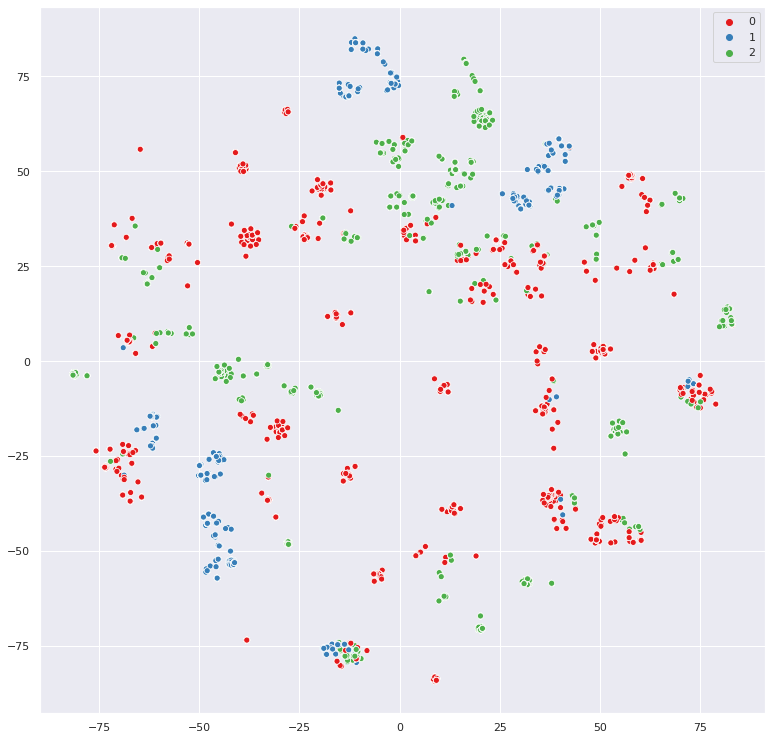

In [30]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})



sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

In [31]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4651,6950,"Missing, The (2003)",Adventure|Thriller|Western,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
714,933,To Catch a Thief (1955),Crime|Mystery|Romance|Thriller,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0
4925,7382,I'm Not Scared (Io non ho paura) (2003),Drama|Mystery|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
8682,122884,Insidious: Chapter 3 (2015),Fantasy|Horror|Thriller,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
9132,146688,Solace (2015),Fantasy|Mystery|Thriller,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
8797,130083,Kidnapping Mr. Heineken (2015),Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
5269,8665,"Bourne Supremacy, The (2004)",Action|Crime|Thriller,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2974,3986,"6th Day, The (2000)",Action|Sci-Fi|Thriller,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
9411,165347,Jack Reacher: Never Go Back (2016),Action|Crime|Drama|Mystery|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
3421,4658,Santa Sangre (1989),Drama|Horror|Mystery|Thriller,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [32]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [35]:
kmeans(20, generos_escalados)

[20, 55452.99607441947]

In [38]:
kmeans(3, generos_escalados)

[3, 166231.2688196089]

In [39]:

resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 180381.50577587774],
 [3, 167861.07193199746],
 [4, 158251.63246351274],
 [5, 147244.08477118044],
 [6, 138090.6310538536],
 [7, 129351.57979841346],
 [8, 118685.46561232809],
 [9, 110876.19829715618],
 [10, 103926.00083857053],
 [11, 94156.88286981802],
 [12, 87205.48839502434],
 [13, 79440.38331280963],
 [14, 73609.53914250644],
 [15, 71217.37342780916],
 [16, 63613.083133695836],
 [17, 62133.72155187139],
 [18, 59987.726524749545],
 [19, 56811.97553098956],
 [20, 55664.01014555484],
 [21, 53698.91236860648],
 [22, 52903.85632130661],
 [23, 51484.06243454716],
 [24, 49422.22073018054],
 [25, 47030.947720892014],
 [26, 46858.61593944347],
 [27, 45925.97050338649],
 [28, 45035.38198935873],
 [29, 44160.66334939508],
 [30, 43084.88553072429],
 [31, 42265.81475464181],
 [32, 41679.23961565159],
 [33, 39878.2584009666],
 [34, 38973.037774035336],
 [35, 38672.32137943434],
 [36, 38019.470379338294],
 [37, 37251.22092801126],
 [38, 36729.04633235591],
 [39, 35962.350295

In [40]:
resultado = pd.DataFrame(resultado, 
            columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,180381.505776
2,3,167861.071932
3,4,158251.632464
4,5,147244.084771
5,6,138090.631054
6,7,129351.579798
7,8,118685.465612
8,9,110876.198297
9,10,103926.000839


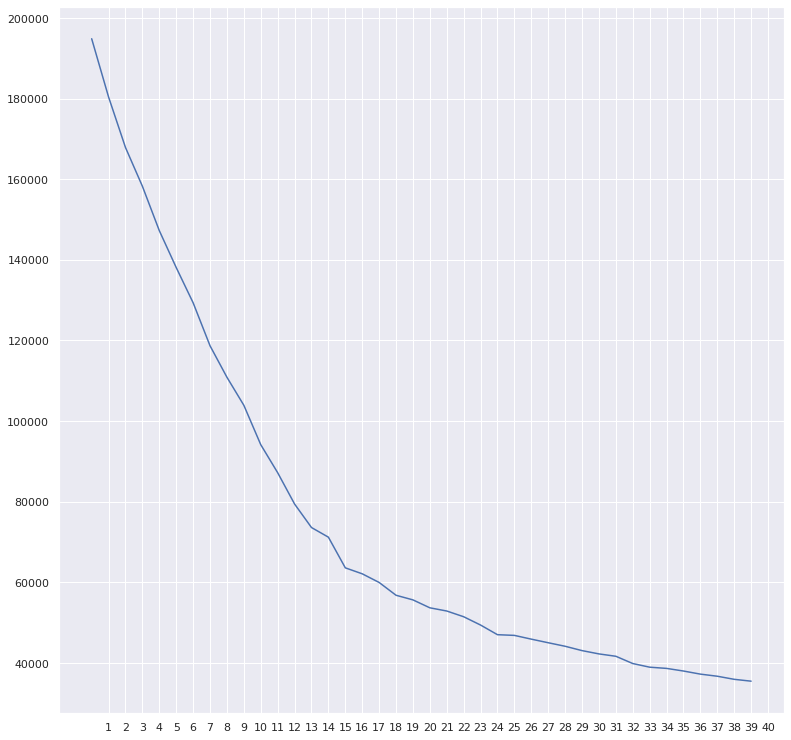

In [41]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8f941e630>,
      dtype=object)

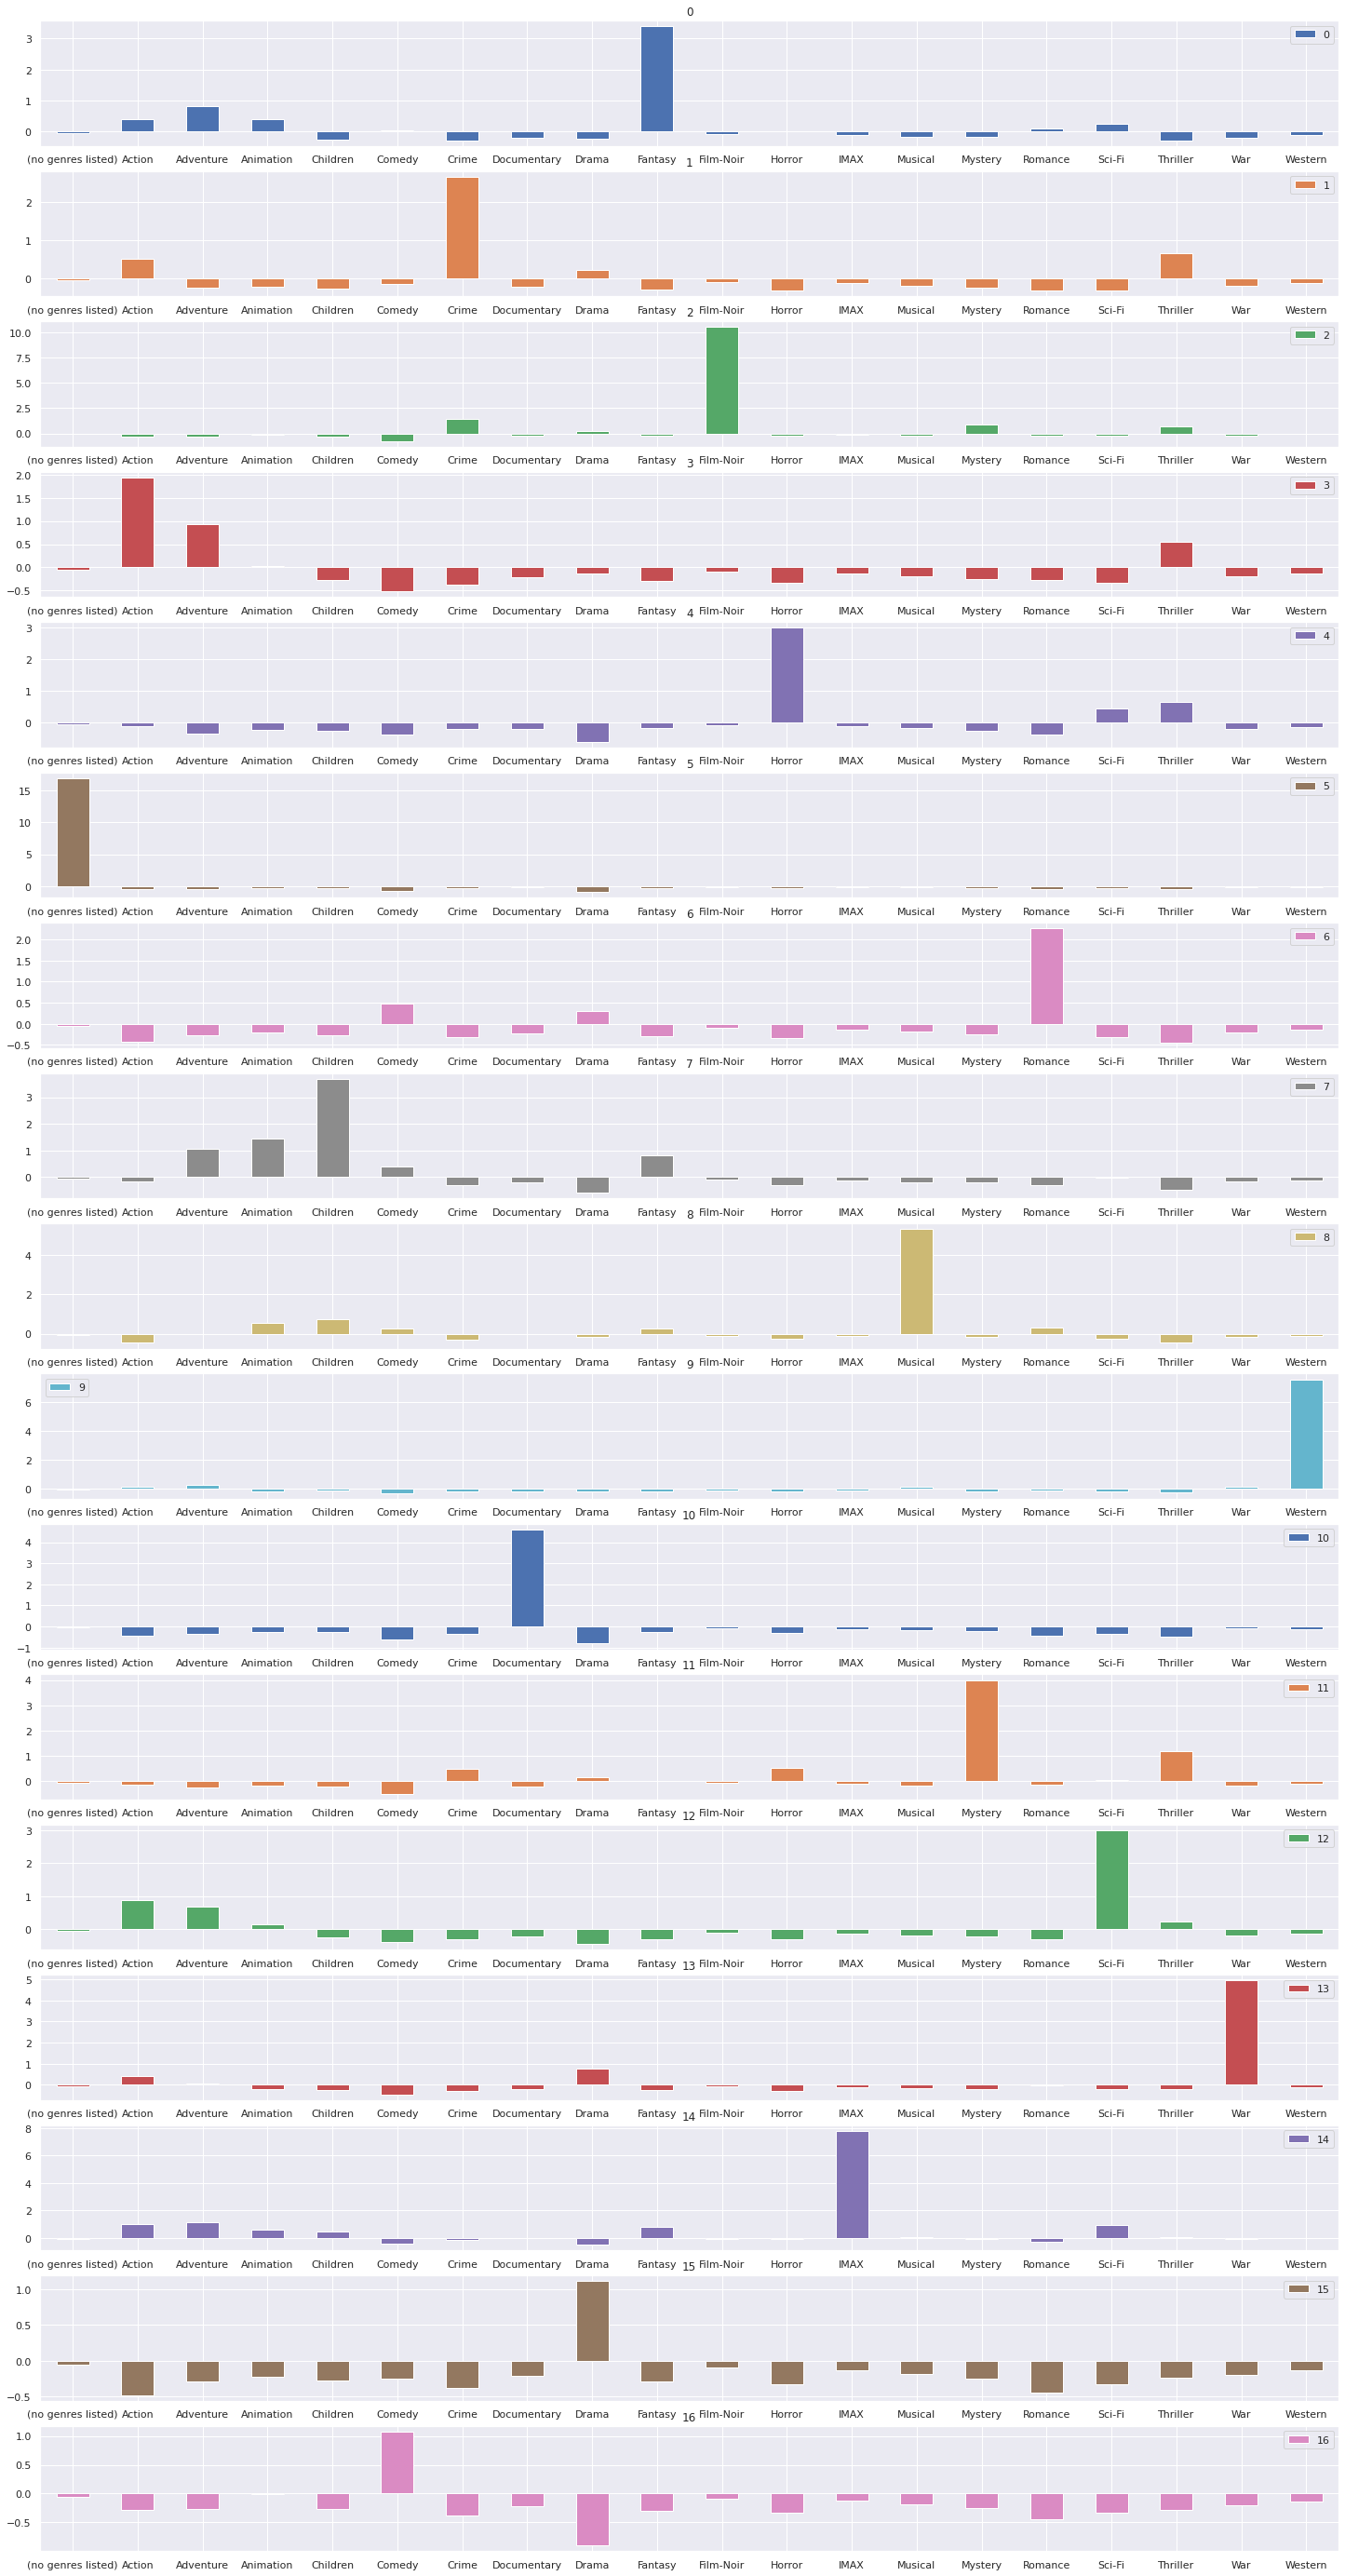

In [42]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [43]:
grupo = 16

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4868,7294,Welcome to Mooseport (2004),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3136,4220,"Longest Yard, The (1974)",Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8061,99106,"Guilt Trip, The (2012)",Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9297,158872,Sausage Party (2016),Animation|Comedy,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4481,6619,Uptown Girls (2003),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6775,60126,Get Smart (2008),Action|Comedy,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8581,117109,Too Many Cooks (2014),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7637,87867,Zookeeper (2011),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5971,35807,"Teahouse of the August Moon, The (1956)",Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
357,413,Airheads (1994),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
from sklearn.cluster import AgglomerativeClustering
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [45]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-10.548619, -59.193146],
       [-21.350536, -49.44535 ],
       [-20.25806 , -19.436646],
       ...,
       [ 13.163951,  14.168163],
       [  9.10114 , -34.747673],
       [-21.842216,  10.498552]], dtype=float32)

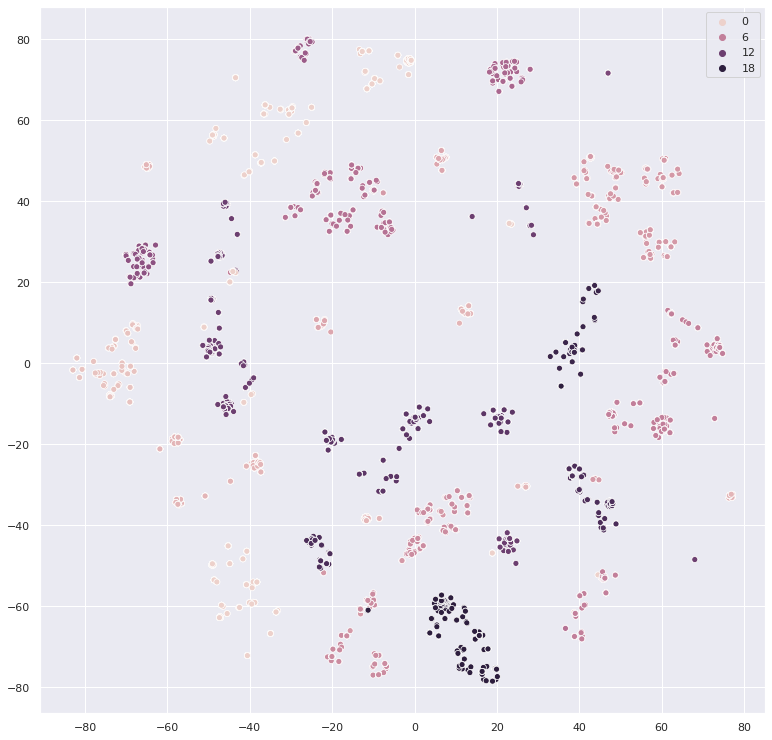

In [46]:
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8f70c4748>,
      dtype=object)

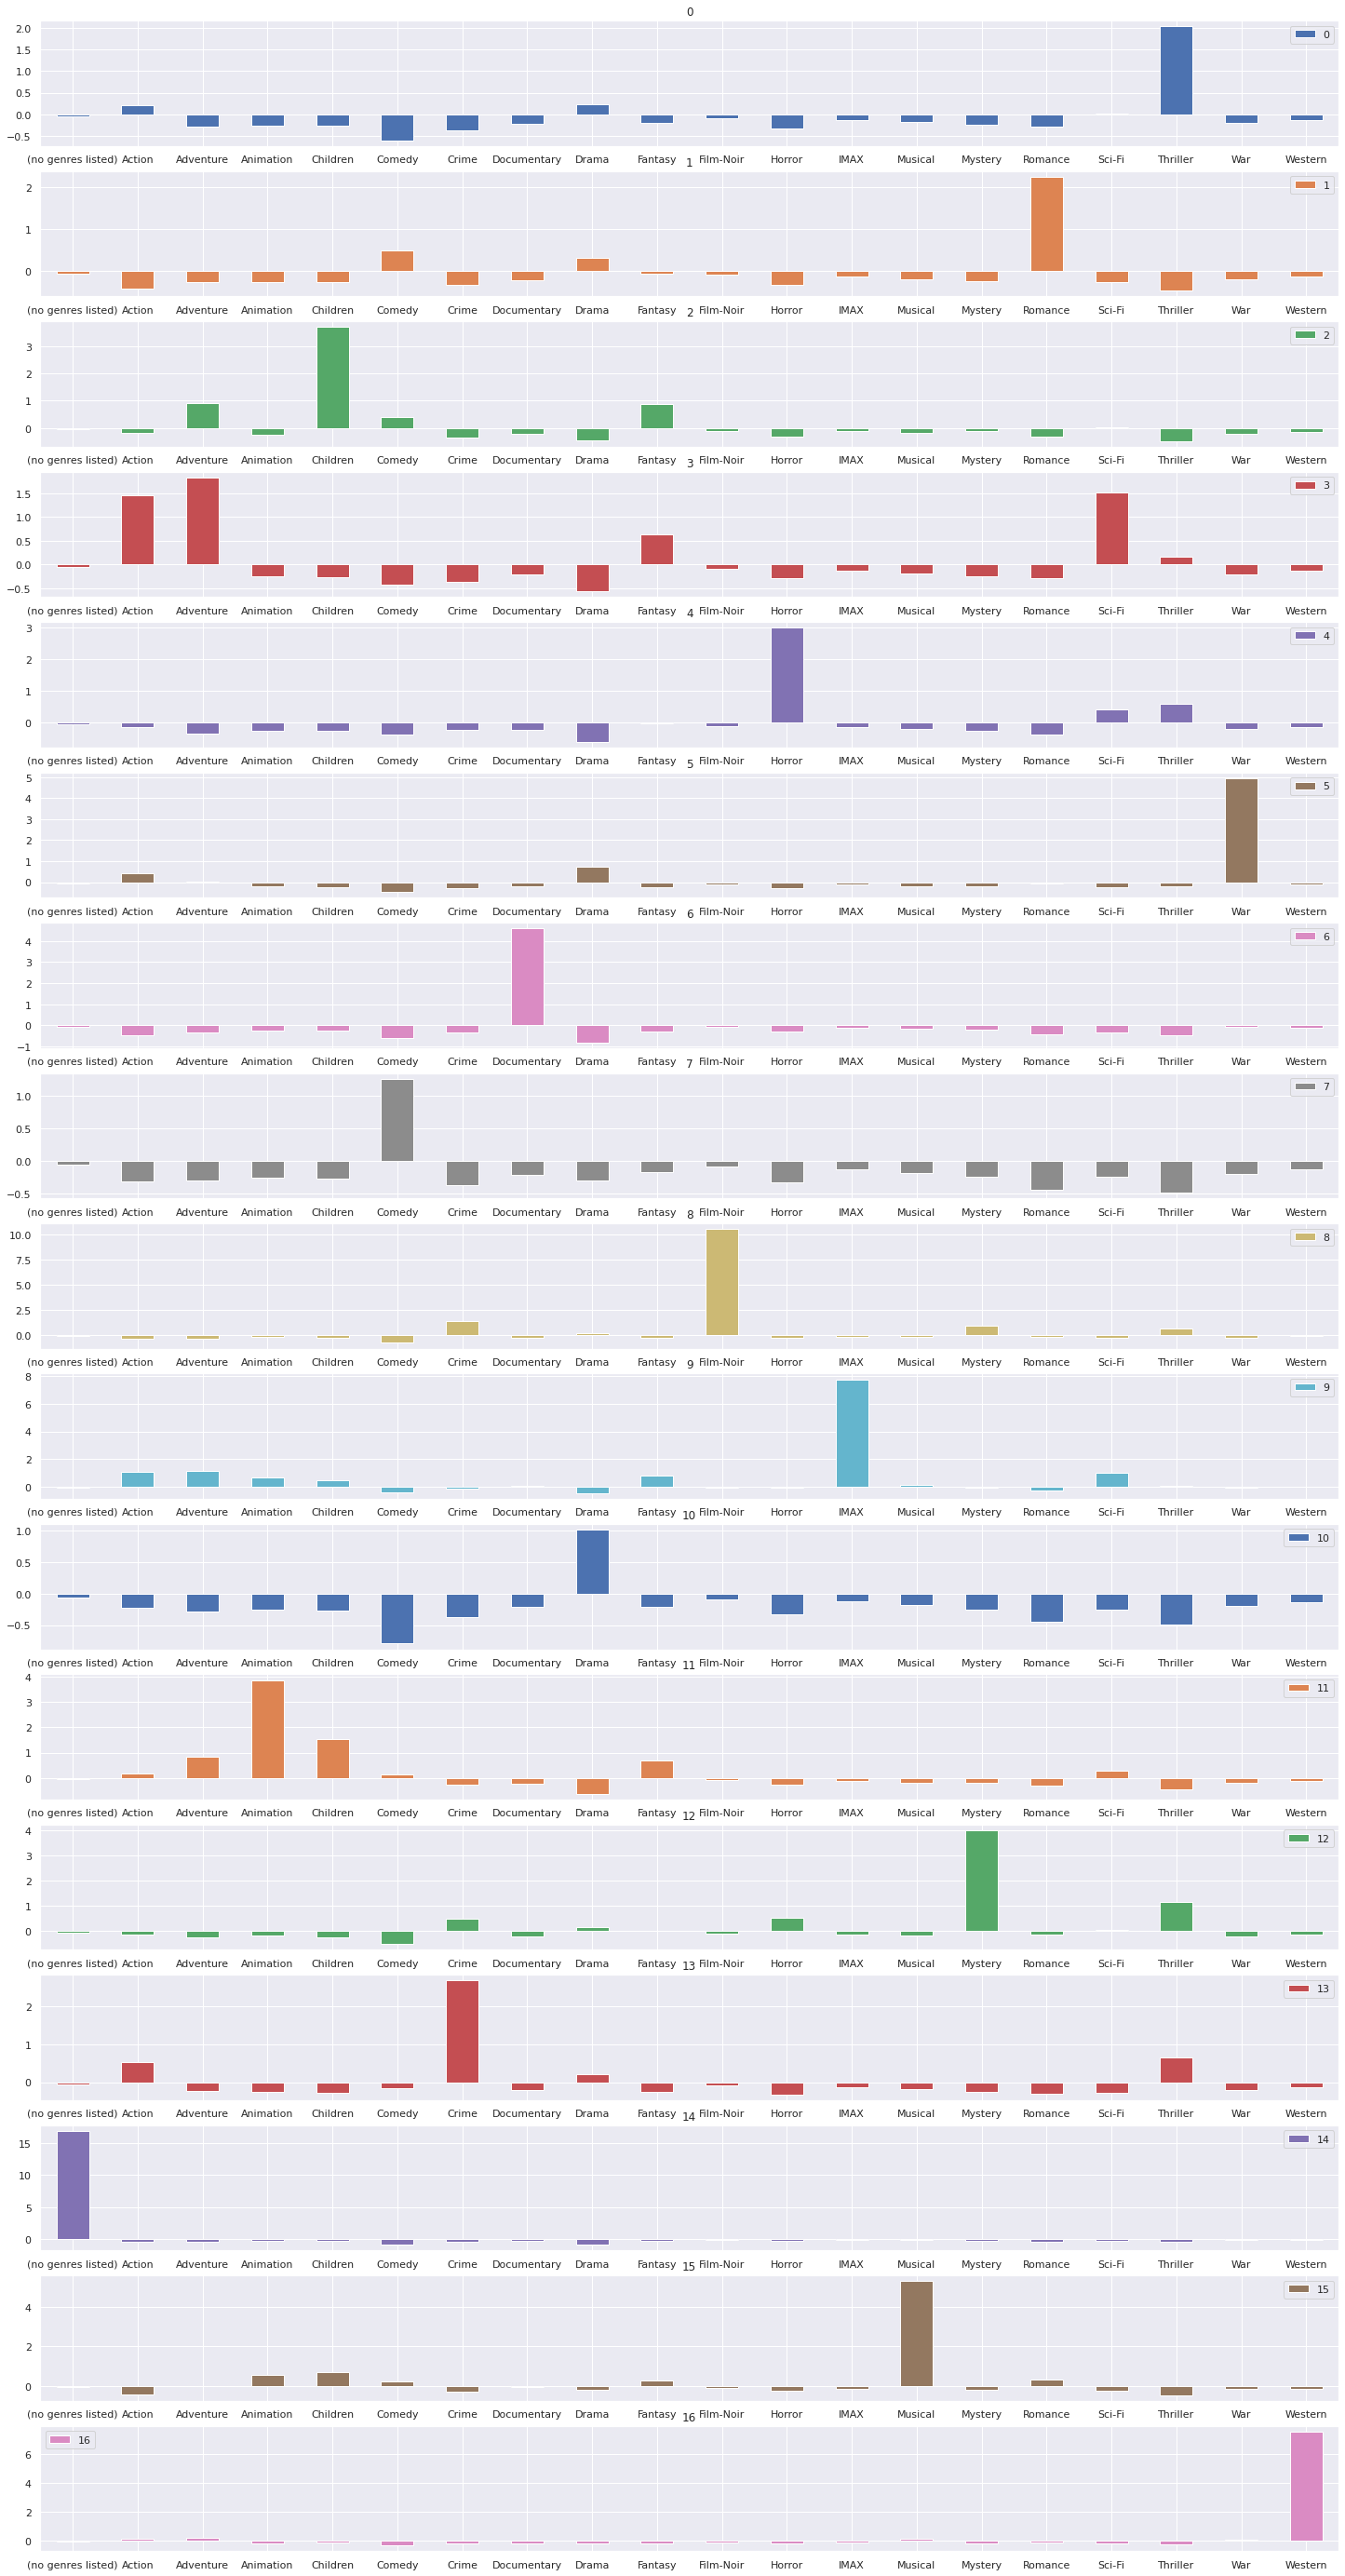

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [48]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 7.        , 10.        ,  2.44169579,  2.        ],
       [ 0.        , 17.        ,  2.70453155,  3.        ],
       [ 1.        , 18.        ,  2.87941469,  4.        ],
       [13.        , 19.        ,  3.40107281,  5.        ],
       [ 3.        , 20.        ,  3.63823213,  6.        ],
       [ 4.        , 21.        ,  3.76672995,  7.        ],
       [ 2.        , 22.        ,  4.38124675,  8.        ],
       [12.        , 23.        ,  4.52776571,  9.        ],
       [11.        , 24.        ,  4.69237742, 10.        ],
       [ 6.        , 25.        ,  5.15921676, 11.        ],
       [ 5.        , 26.        ,  5.24162549, 12.        ],
       [15.        , 27.        ,  5.81711096, 13.        ],
       [16.        , 28.        ,  7.86916049, 14.        ],
       [ 9.        , 29.        ,  8.08216268, 15.        ],
       [ 8.        , 30.        , 10.81689921, 16.        ],
       [14.        , 31.        , 17.06657928, 17.        ]])

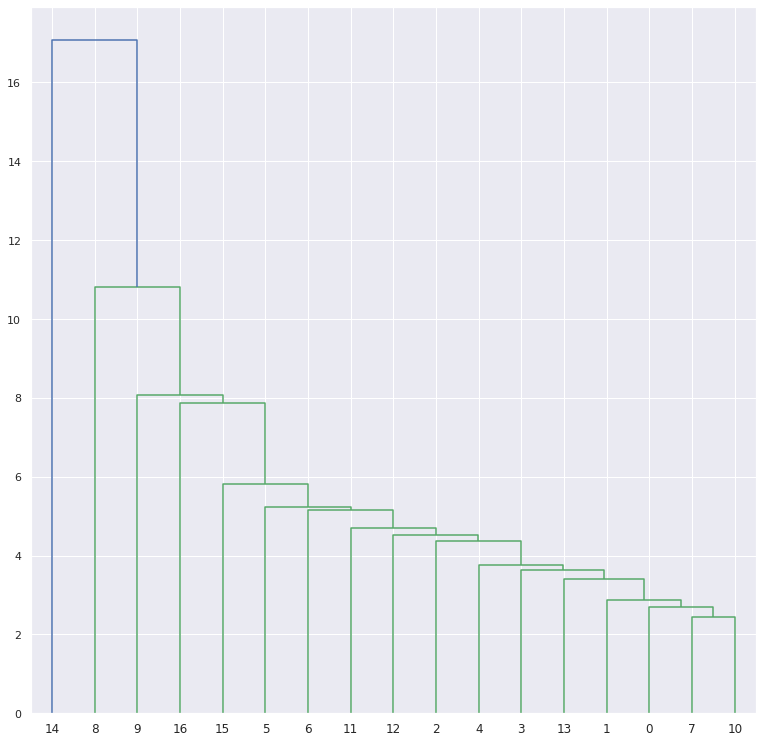

In [49]:
dendrograma = dendrogram(matriz_de_distancia)